References:

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan how to drop values only in a particular column
https://stackoverflow.com/questions/49841989/python-drop-value-0-row-in-specific-columns

to help with genres: https://www.kaggle.com/abhishekchhibber/imdb-analysis-by-genres

this was generally useful (maybe not if dont use) https://static1.squarespace.com/static/55bfa8e4e4b007976149574e/t/5b998f398a922d8eaecaefd2/1536790332004/investigate-dataset-movies.pdf

for calculating z scores https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('movies.csv')

In [2]:
#check shape
df.shape

(10866, 21)

In [3]:
#to get a sense of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# to show the end records in the dataset
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#check type of release date
type(df['release_date'][0])

str

In [7]:
#to change release date from string to a date
df['release_date']=pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# convert budget_adj and revenue_adj to floats
df['budget_adj']=df['budget_adj'].astype(int)
type(df['budget_adj'][0])

numpy.int64

In [9]:
# convert budget_adj and revenue_adj to floats
df['revenue_adj']=df['revenue_adj'].astype(int)
type(df['revenue_adj'][0])

numpy.int64

In [10]:
#delete homepage, tagline, keywords, release date, imdb_id, production_companies
df.drop(['homepage', 'tagline','release_date','imdb_id','keywords','overview','homepage'],axis=1,inplace=True)

In [11]:
#use rename to change column names
df.rename(columns={'original_title':'title','production_companies':'producers'}, inplace=True)
df.head(5)

,id,popularity,budget,revenue,title,cast,director,runtime,genres,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10866 non-null  int64  
 1   popularity    10866 non-null  float64
 2   budget        10866 non-null  int64  
 3   revenue       10866 non-null  int64  
 4   title         10866 non-null  object 
 5   cast          10790 non-null  object 
 6   director      10822 non-null  object 
 7   runtime       10866 non-null  int64  
 8   genres        10843 non-null  object 
 9   producers     9836 non-null   object 
 10  vote_count    10866 non-null  int64  
 11  vote_average  10866 non-null  float64
 12  release_year  10866 non-null  int64  
 13  budget_adj    10866 non-null  int64  
 14  revenue_adj   10866 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 1.2+ MB


In [13]:
# to find null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
title              0
cast              76
director          44
runtime            0
genres            23
producers       1030
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Here we see that there are only 23 records missing values in genres which is what we are looking at, the others don't matter. So only want to delete null values in genres

In [14]:
df = df[df['genres'].notna()]

In [15]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
title              0
cast              75
director          42
runtime            0
genres             0
producers       1016
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [16]:
#to find duplicates
sum(df.duplicated())

1

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
#describe the data - I want to remove records where budget and revenue are 0
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [19]:
df_budget=df.query('budget==0')
df_budget

,id,popularity,budget,revenue,title,cast,director,runtime,genres,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015,0,27006774
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,474,6.2,2015,0,20566197
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,81,5.5,2015,0,42223
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0,0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,1966,0,0
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0,0
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0,0
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0,0


In [20]:
df_budget=df.query('revenue==0')
df_budget

,id,popularity,budget,revenue,title,cast,director,runtime,genres,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,481,5.3,2015,27599987,0
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,280,5.4,2015,18399991,0
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0,0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015,0,0
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0,0
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0,0
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0,0
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0,0


In [21]:
#shrinking data frame to only items with budget>0
df = df[(df['budget'] > 0)]

In [22]:
df_budget=df.query('budget==0')
df_budget

,id,popularity,budget,revenue,title,cast,director,runtime,genres,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [23]:
#shrinking data frame to only items with revenue>0
df = df[(df['revenue'] > 0)]

In [24]:
df_budget=df.query('revenue==0')
df_budget

,id,popularity,budget,revenue,title,cast,director,runtime,genres,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [25]:
df.shape

(3854, 15)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3854 non-null   int64  
 1   popularity    3854 non-null   float64
 2   budget        3854 non-null   int64  
 3   revenue       3854 non-null   int64  
 4   title         3854 non-null   object 
 5   cast          3850 non-null   object 
 6   director      3853 non-null   object 
 7   runtime       3854 non-null   int64  
 8   genres        3854 non-null   object 
 9   producers     3808 non-null   object 
 10  vote_count    3854 non-null   int64  
 11  vote_average  3854 non-null   float64
 12  release_year  3854 non-null   int64  
 13  budget_adj    3854 non-null   int64  
 14  revenue_adj   3854 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 481.8+ KB


In [27]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,2.000000e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


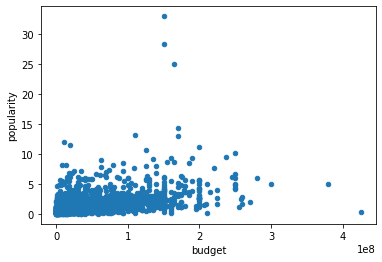

In [28]:
# scatterplot of budget and popularity
df.plot(x='budget', y='popularity', kind='scatter'); #we could edit out the outliers of above 10 to get a better response

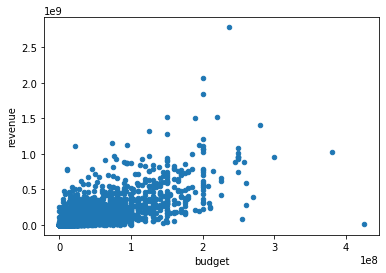

In [29]:
# scatterplot of budget and revenue
df.plot(x='budget', y='revenue', kind='scatter');

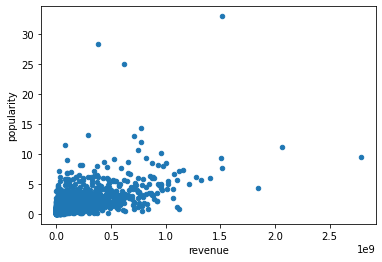

In [30]:
# scatterplot of budget and revenue
df.plot(x='revenue', y='popularity', kind='scatter');

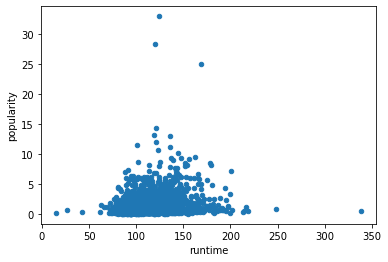

In [31]:
# scatterplot of popularity and runtime
df.plot(x='runtime', y='popularity', kind='scatter');

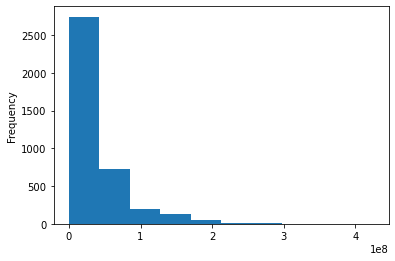

In [32]:
# histogram for budget
df['budget'].plot(kind='hist');

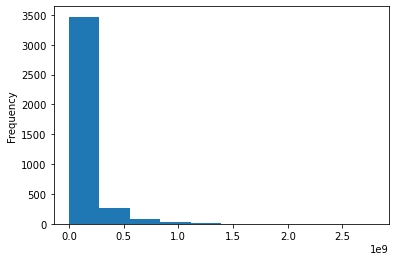

In [33]:
# histogram for revenue
df['revenue'].plot(kind='hist');

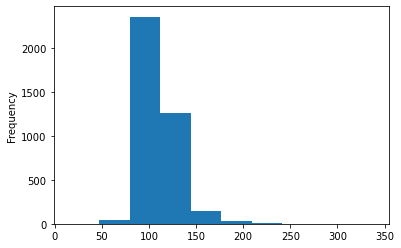

In [34]:
# histogram for runtime
df['runtime'].plot(kind='hist');

In [35]:
df['runtime'].mean()

109.22029060716139

In [36]:
df['runtime'].median()

106.0

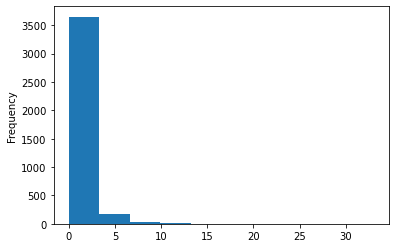

In [37]:
#histogram for popularity
df['popularity'].plot(kind='hist');

In [38]:
df['popularity'].mean()

1.1915540918526204

In [39]:
df['popularity'].median()

0.7975105

In [40]:
#create a new df for genre analysis
df_genre=df.copy()
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3854 non-null   int64  
 1   popularity    3854 non-null   float64
 2   budget        3854 non-null   int64  
 3   revenue       3854 non-null   int64  
 4   title         3854 non-null   object 
 5   cast          3850 non-null   object 
 6   director      3853 non-null   object 
 7   runtime       3854 non-null   int64  
 8   genres        3854 non-null   object 
 9   producers     3808 non-null   object 
 10  vote_count    3854 non-null   int64  
 11  vote_average  3854 non-null   float64
 12  release_year  3854 non-null   int64  
 13  budget_adj    3854 non-null   int64  
 14  revenue_adj   3854 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 481.8+ KB


In [41]:
mov_titl = df_genre[['genres','id','title','popularity','budget','revenue','cast','director','runtime','producers','vote_count','vote_average','release_year', 'budget_adj', 'revenue_adj']]
mov_titl.head()

,genres,id,title,popularity,budget,revenue,cast,director,runtime,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
1,Action|Adventure|Science Fiction|Thriller,76341,Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292
2,Adventure|Science Fiction|Thriller,262500,Insurgent,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025
3,Action|Adventure|Science Fiction|Fantasy,140607,Star Wars: The Force Awakens,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129
4,Action|Crime|Thriller,168259,Furious 7,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801


In [42]:
# split the genres column for analysis
sub_gen = mov_titl['genres'].str.split('|').apply(pd.Series, 1).stack()
sub_gen.index = sub_gen.index.droplevel(-1)
sub_gen.name = 'genre'
df_genre = mov_titl.join(sub_gen)
mov_titl=df_genre[['id','title','genre','popularity','budget','revenue','cast','director','runtime','producers','vote_count','vote_average','release_year', 'budget_adj', 'revenue_adj']]
mov_titl.head(4) #reordered titles

,id,title,genre,popularity,budget,revenue,cast,director,runtime,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,Jurassic World,Action,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,Jurassic World,Adventure,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,Jurassic World,Science Fiction,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,Jurassic World,Thriller,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892


Text(0, 0.5, 'Popularity')

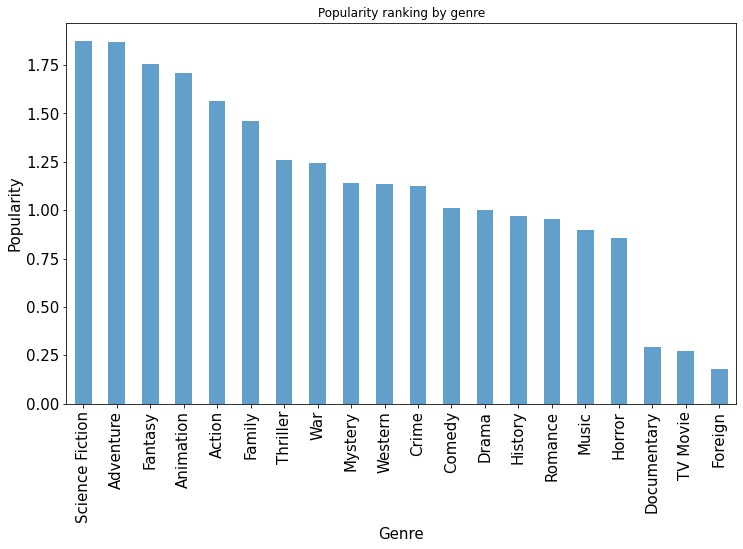

In [43]:
#plotting the mean popularity for genre
#popular = mov_titl.groupby('genre').sort_values(by = 'popularity' , ascending = False)
#grouped = df.groupby('mygroups').sum().reset_index()
#grouped.sort_values('mygroups', ascending=False)

popular=mov_titl.groupby('genre')['popularity'].mean().sort_values(ascending=False)
popular.plot(kind='bar',title='Popularity ranking by genre', alpha=0.7, figsize=(12,7), fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Popularity',fontsize=15)

In [44]:
mov_titl.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10303.000000,10303.000000,1.030300e+04,1.030300e+04,10303.000000,10303.000000,10303.000000,10303.000000,1.030300e+04,1.030300e+04
mean,36345.654373,1.262140,4.163969e+07,1.196728e+08,109.568572,574.091818,6.156100,2000.921867,4.953497e+07,1.517441e+08
std,63106.313340,1.607645,4.532367e+07,1.923069e+08,20.354248,940.428711,0.789695,11.277350,4.766345e+07,2.324153e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,2.000000e+00
25%,5548.000000,0.476927,1.100000e+07,1.486008e+07,96.000000,76.000000,5.700000,1995.000000,1.554024e+07,2.041316e+07
50%,11040.000000,0.843170,2.500000e+07,5.054911e+07,106.000000,225.000000,6.200000,2004.000000,3.448528e+07,6.847909e+07
75%,34769.000000,1.462242,5.700000e+07,1.410472e+08,119.000000,632.500000,6.700000,2010.000000,6.956016e+07,1.825920e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [45]:
#here I have created a new column with the decades
bin_edges=[1960,1970,1980,1990,2000,2010,2015]
bin_names=['60s','70s','80s','90s','00s','10s']
mov_titl['decades']=pd.cut(mov_titl['release_year'],bin_edges,labels=bin_names)

What is genre profitability?

In [46]:
mov_titl['profit'] = mov_titl['revenue'] - mov_titl['budget']
mov_titl.head(4)

,id,title,genre,popularity,budget,revenue,cast,director,runtime,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades,profit
0,135397,Jurassic World,Action,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,10s,1363528810
0,135397,Jurassic World,Adventure,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,10s,1363528810
0,135397,Jurassic World,Science Fiction,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,10s,1363528810
0,135397,Jurassic World,Thriller,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,10s,1363528810


Text(0, 0.5, 'Profitability')

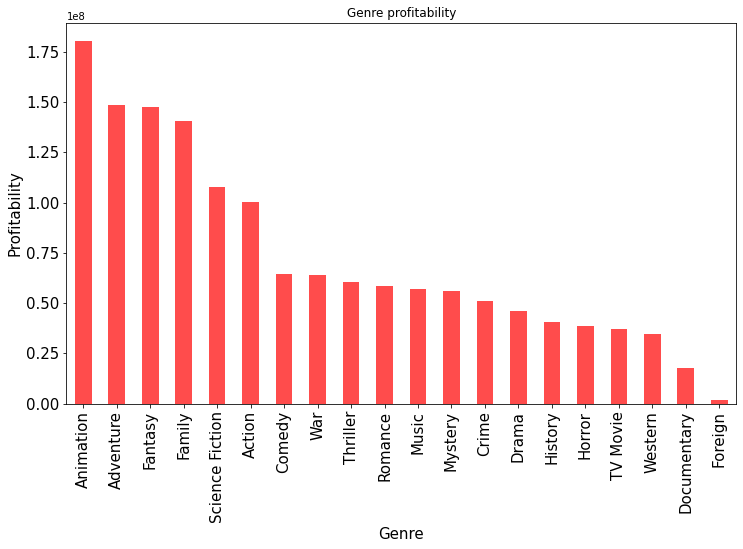

In [47]:
popular=mov_titl.groupby('genre')['profit'].mean().sort_values(ascending=False)
popular.plot(kind='bar',title='Genre profitability', alpha=0.7, figsize=(12,7), color=('red'), fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Profitability',fontsize=15)

what genres have cumulatively commanded the biggest budgets?

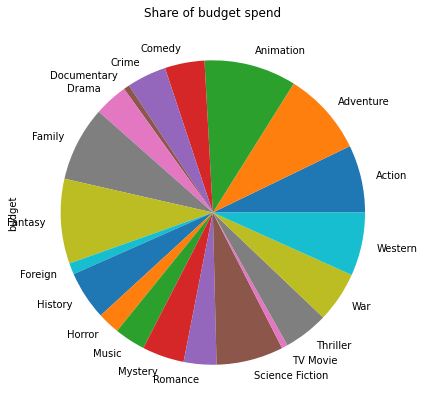

In [48]:
spend=mov_titl.groupby('genre')['budget'].mean();
spend.plot(kind='pie', figsize=(12,7), title='Share of budget spend')

In [49]:
spend=mov_titl.groupby('profit')['decades'].mean();
spend.plot(kind='bar', figsize=(12,7), title='Share of budget spend')

DataError: No numeric types to aggregate

In [ ]:
# outliers
#boston_df_o = boston_df_o[(z < 3).all(axis=1)]